In [ ]:
# Descriptions: This program uses artifical recurrent neural netwokr called Long Short Term Memory (LSTM)
#               to predict the closing stock price of a corporation (Apple Inc.) using the past 60 days stock price.


In [38]:
#Import the python libraries
import math
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM

!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()


In [42]:
#Get the Stock Quote
df = web.DataReader ('AAPL', data_source='yahoo', start='2012-01-01', end='2022-01-01')
#Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575916,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643501,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783867,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917506,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897018,394024400
...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.100540,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.061859,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,179.151749,62348900


In [43]:
#Get the number of rows and colums in the data set
df.shape

(2517, 6)

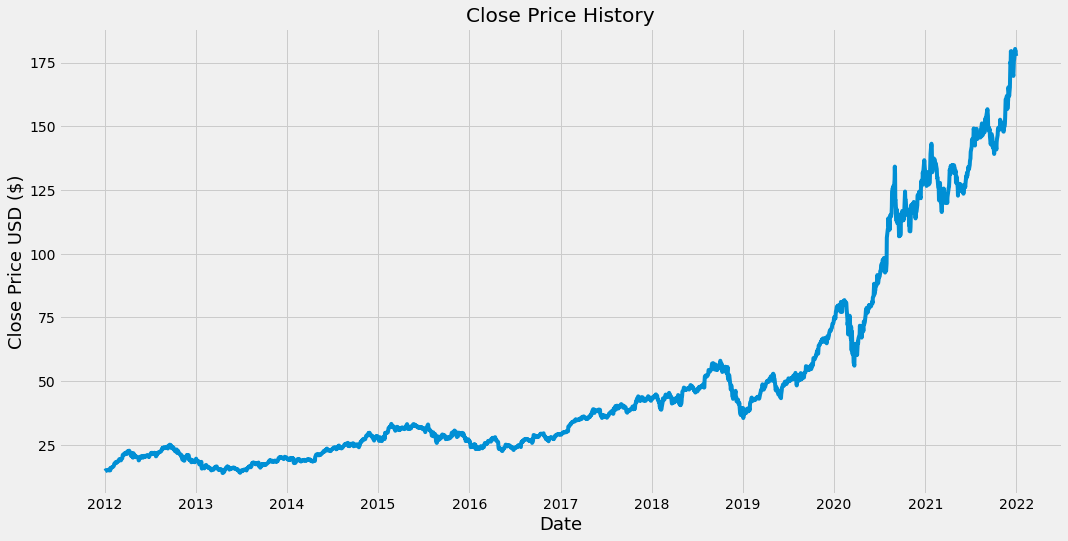

In [49]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [52]:
#Create a new dataframe with only the 'Close Colum
data = df.filter(['Close'])

# Convert the datafram to a numoy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8)

training_data_len


2014

In [53]:
#Scale the data
scaler = MinMaxScaler (feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


scaled_data

array([[0.00444329],
       [0.00491767],
       [0.00590292],
       ...,
       [0.99429028],
       [0.98719814],
       [0.98341175]])

In [55]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data inot x_train and y_train data sets
x_train = []
y_train = []


for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00444329, 0.00491767, 0.00590292, 0.00684095, 0.00669713,
       0.00702125, 0.00687314, 0.00662415, 0.006285  , 0.00733465,
       0.00828126, 0.00798934, 0.00639018, 0.00791635, 0.00641379,
       0.0120484 , 0.01161266, 0.01218148, 0.01341144, 0.01415627,
       0.01409403, 0.01386435, 0.01484316, 0.01576401, 0.01680723,
       0.01849225, 0.02203185, 0.02208551, 0.02405602, 0.02552852,
       0.02299779, 0.0239723 , 0.02395298, 0.0266855 , 0.02629698,
       0.02701606, 0.02830826, 0.02902735, 0.03109874, 0.03260773,
       0.03304348, 0.03319588, 0.03061578, 0.02999328, 0.03008558,
       0.03251115, 0.03319374, 0.03465981, 0.0381157 , 0.04272642,
       0.04186352, 0.04186566, 0.04519921, 0.04624242, 0.04549971,
       0.04482142, 0.04411522, 0.04646135, 0.04807125, 0.04874525])]
[0.047079553022239484]

[array([0.00444329, 0.00491767, 0.00590292, 0.00684095, 0.00669713,
       0.00702125, 0.00687314, 0.00662415, 0.006285  , 0.00733465,
       0.00828126, 0.00798934, 0.0

In [57]:
#Conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [61]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape [1], 1))
x_train.shape

(1954, 60, 1)

In [69]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [72]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [73]:
#Train the model 
model.fit(x_train, y_train, batch_size=1, epochs=1)

1954/1954 [==============================] - 65s 31ms/step - loss: 1.7819e-04


In [74]:
#Create the testing dataset
#Create a new array containing scaled valus from index 1954 to 2403

test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

  

In [76]:
#Convert the daat to a numpy array
x_test = np.array(x_test)

In [78]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [81]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [90]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

10.87441026499049

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


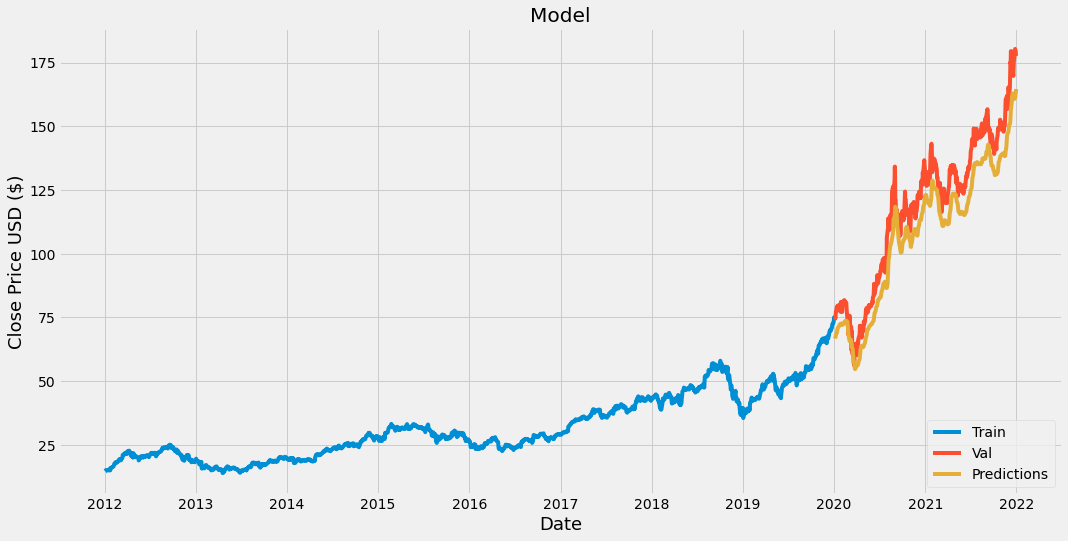

In [91]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid ['Predictions']= predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [92]:
#Show the valid and predicted prices
valid 

,Close,Predictions
Date,,
2020-01-06,74.949997,66.720390
2020-01-07,74.597504,67.179199
2020-01-08,75.797501,67.520256
2020-01-09,77.407501,67.898621
2020-01-10,77.582497,68.434456
...,...,...
2021-12-27,180.330002,161.007095
2021-12-28,179.289993,162.005524
2021-12-29,179.380005,163.039230


In [108]:
#Get the quote 
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-01-01')
#Create a new datafram
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the datafram to an array
last_60_days = new_df[-60:].values
#Sclae the datat to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[164.88979]]


In [ ]:
#Get the quote 
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2022-01-01', end='2022-01-01')
print(apple_quote2['Close'])